In [41]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="whitegrid",
        color_codes = True,
        font_scale = 1.5)

### Loading in the Data

We begin by loading in the data, and looking at the first few entries of each dataframe. This data was obtained from 

In [7]:
#loading in datasets
fake = pd.read_csv("Fake.csv")
real = pd.read_csv("True.csv")

In [8]:
#looking at the fake table
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
#looking at the real table
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Now we want to see how many entries there are for each table

In [10]:
#Show how many entries are in each table
print(real.shape)
print(fake.shape)

(21417, 4)
(23481, 4)


There are 21417 real news entries and 23481 fake news entries. 

In order to do my analysis I want to be able to look at all the news entries at once, and eventually construct a training and testing split for the data. Thus I add a classification column which contains the label for whether the news is fake or real, and then concatenate the two dataframes into a complete set dataframe. 

In [30]:
#adding labels and constructing a joint table to create a test set.
#0 indicates not fake and 1 indicates fake 
real["fake"] = 0
fake["fake"] = 1
complete_set = pd.concat([real, fake])
complete_set.head()

,title,text,subject,date,class,fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,0


Next we will look for any null values in the columns, and if present replace them with the empty string

In [31]:
#Looking for Null Values in the Columns 
for column in complete_set: 
    print(complete_set[column].isna().sum())

0
0
0
0
0
0


Finally I want to look at an example for a fake news article and a real news article. 

In [33]:
real_example = complete_set[complete_set['fake'] == 0].iloc[0, 1]
fake_example = complete_set[complete_set['fake'] == 1].iloc[0, 1]

In [34]:
print(real_example)

WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educati

In [35]:
print(fake_example)

Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t eve

### Constructing the Train and Test Sets for our Data

In [36]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(complete_set, test_size=0.2, random_state=42)

In [37]:
train.head()

,title,text,subject,date,class,fake
14918,HILLARY LIES: Remember When Hillary Disclosed ...,This story is from 2006 and is the first in a ...,politics,"Nov 18, 2015",0,1
12384,EU leaders likely to give go-ahead to new phas...,PARIS (Reuters) - The leaders of the European ...,worldnews,"December 13, 2017",1,0
3002,Mark Hamill Is Back Mocking Trump By Reading ...,Star Wars icon Mark Hamill previously mocked D...,News,"January 15, 2017",0,1
3323,Trump Gets Hilariously OWNED For Whining Abou...,The whiner-in-chief struck again with yet anot...,News,"December 21, 2016",0,1
5622,Obama’s Labor Secretary Zaps Trump’s Foreign ...,Donald Trump doesn t have much foreign policy ...,News,"July 3, 2016",0,1


## Exploratory Data Analysis

In [38]:
train['subject'].value_counts()

politicsNews       8992
worldnews          8095
News               7305
politics           5472
left-news          3555
Government News    1242
Middle-east         633
US_News             624
Name: subject, dtype: int64

In [52]:
real['subject'].value_counts()

politicsNews    8992
worldnews       8095
Name: subject, dtype: int64

In [53]:
fake['subject'].value_counts()

News               7305
politics           5472
left-news          3555
Government News    1242
Middle-east         633
US_News             624
Name: subject, dtype: int64

From the above cells we can see that the same subjects do not appear in the real and fake news datasets. The real news subjects only include politicsNews and worldNews while the fake news dataset contains subjects from various other domains. Thus we can likely drop this column as this feature isn't useful for our classification, although looking into the subjects for the fake news dataset might be interesting in further analysis. 

In [39]:
#Defining a function to find words that appear in a series of texts. 
#This will help with future analysis and visualization.

def words_in_texts(words, texts): 
    '''
    Args: Takes in a list of words and a pandas series of texts
    Returns: 2-Dimensional NumPy array which includes an indicator (0 or 1) for each 
             text where 0 if the word doesn't appear in the text and 1 if word does appear. 
    '''
    indicator_array = np.array([texts.str.contains(w).values.astype(int) for w in words]).T
    return indicator_array

First we will create a class conditional density plot to compare the distributions of the length of texts for both fake and real news. We will also create a distplot for for the length of titles for both fake and real news. 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


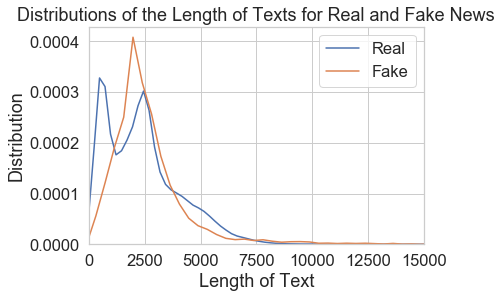

In [55]:
train['text_length'] = train['text'].str.len()
real = train[train['fake'] == 0]
fake = train[train['fake'] == 1]
plt.xlim(0, 15000)
sns.distplot(real['text_length'], hist=False, label='Real')
sns.distplot(fake['text_length'], hist=False, label='Fake')
plt.xlabel('Length of Text')
plt.ylabel('Distribution')
plt.title('Distributions of the Length of Texts for Real and Fake News')
plt.legend();

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


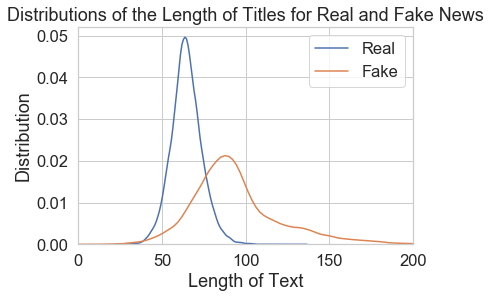

In [56]:
train['title_length'] = train['title'].str.len()
real = train[train['fake'] == 0]
fake = train[train['fake'] == 1]
plt.xlim(0, 200)
sns.distplot(real['title_length'], hist=False, label='Real')
sns.distplot(fake['title_length'], hist=False, label='Fake')
plt.xlabel('Length of Text')
plt.ylabel('Distribution')
plt.title('Distributions of the Length of Titles for Real and Fake News')
plt.legend();